In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_breast_cancer

In [2]:
# Problem #1

In [ ]:
# Yes you can train log regression over 30 inputs, you just cant plot
# in 30 dimensions

In [3]:
breast = load_breast_cancer()

In [4]:
breast_data = breast.data 
breast_data.shape 

(569, 30)

In [5]:
breast_input = pd.DataFrame(breast_data)
breast_input.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
breast_labels = breast.target 

In [7]:
breast_labels.shape 

(569,)

In [8]:
labels = np.reshape(breast_labels,(569,1)) 

In [9]:
final_breast_data = np.concatenate([breast_data,labels],axis=1) 

In [10]:
final_breast_data.shape

(569, 31)

In [11]:
breast_dataset = pd.DataFrame(final_breast_data) 

In [12]:
features = breast.feature_names 
features 

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [13]:
features_labels = np.append(features,'label')

In [14]:
breast_dataset.columns = features_labels

In [15]:
breast_dataset.head() 

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [16]:
X = breast_dataset.iloc[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29]].values 
Y = breast_dataset.iloc[:, 30].values 

In [17]:
from sklearn.model_selection import train_test_split 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [18]:
from sklearn.preprocessing import StandardScaler 
sc_X = StandardScaler() 
X_train = sc_X.fit_transform(X_train) 
X_test = sc_X.transform(X_test)

In [19]:
from sklearn.linear_model import LogisticRegression 
classifier = LogisticRegression(random_state=0) 
classifier.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [20]:
Y_pred = classifier.predict(X_test)

In [21]:
Y_pred[0:9] 

array([0., 1., 1., 1., 1., 1., 1., 1., 1.])

In [22]:
from sklearn.metrics import confusion_matrix 
cnf_matrix = confusion_matrix(Y_test, Y_pred) 
cnf_matrix 

array([[45,  2],
       [ 2, 65]], dtype=int64)

In [23]:
from sklearn import metrics 
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred)) 
print("Precision:",metrics.precision_score(Y_test, Y_pred)) 
print("Recall:",metrics.recall_score(Y_test, Y_pred)) 

Accuracy: 0.9649122807017544
Precision: 0.9701492537313433
Recall: 0.9701492537313433


Text(0.5, 257.44, 'Predicted label')

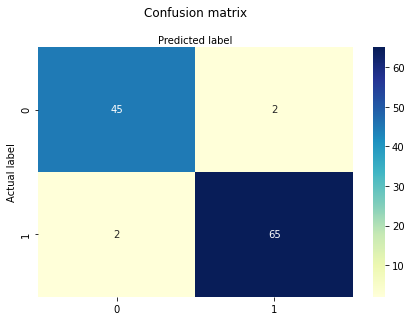

In [24]:
import seaborn as sns 
class_names=[0,1] # name  of classes 
fig, ax = plt.subplots() 
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names) 
plt.yticks(tick_marks, class_names) 
# create heatmap 
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top") 
plt.tight_layout() 
plt.title('Confusion matrix', y=1.1) 
plt.ylabel('Actual label') 
plt.xlabel('Predicted label') 

In [25]:
# Problem #2

In [26]:
# The best k found was 11, this is because after k=10 the change was
# either not significant, or didn't change at all

In [27]:
x = StandardScaler().fit_transform(X)

In [28]:
from sklearn.decomposition import PCA 

accuracy = []
precision = []
recall = []
temp = 0

for k in range(1,31):
    pca = PCA(n_components=k) 
    principalComponents = pca.fit_transform(x) 
    principalDf = pd.DataFrame(data = principalComponents 
                 , columns = [*range(1,k+1)]) 
    finalDf = pd.concat([principalDf, breast_dataset[['label']]], axis = 1)
    
    finalDf.pop('label')
    X1 = finalDf.values
    
    import random
    X_train, X_test, Y_train, Y_test = train_test_split(X1, Y, train_size=0.8, test_size=0.2,random_state = 0)
    
    classifier.fit(X_train, Y_train)
    
    Y_pred = classifier.predict(X_test)

    accuracy.append(metrics.accuracy_score(Y_test, Y_pred))
    precision.append(metrics.precision_score(Y_test, Y_pred))
    recall.append(metrics.recall_score(Y_test, Y_pred))
    
    avg = (accuracy[k-1] + precision[k-1] + recall[k-1])/ 3
    
    if avg > temp:
        temp = avg
        saved_index = k


print("Accuracy for best k: ", accuracy[saved_index])
print("Precision for best k: ", precision[saved_index])
print("Recall for best k: ", recall[saved_index])

Accuracy for best k:  0.9649122807017544
Precision for best k:  0.9701492537313433
Recall for best k:  0.9701492537313433


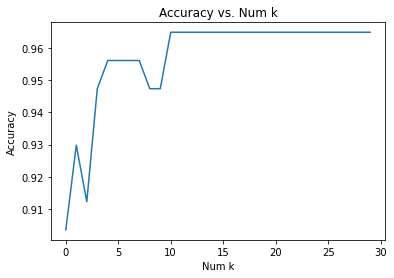

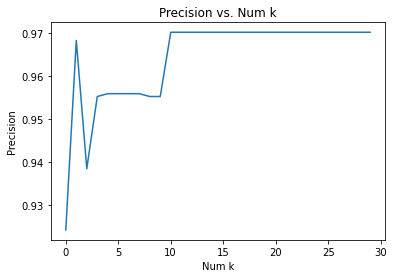

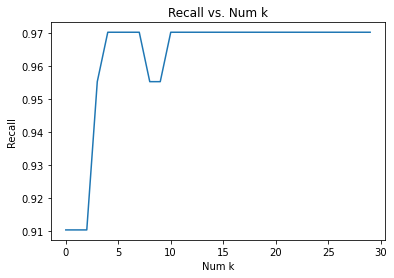

In [29]:
plt.plot(accuracy)
plt.xlabel('Num k')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Num k')
plt.show()

plt.plot(precision)
plt.xlabel('Num k')
plt.ylabel('Precision')
plt.title('Precision vs. Num k')
plt.show()

plt.plot(recall)
plt.xlabel('Num k')
plt.ylabel('Recall')
plt.title('Recall vs. Num k')
plt.show()

In [30]:
# Problem 3

In [ ]:
# There were no false positives found after classification
# Therefore our recall is 100%

In [31]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix

In [32]:
lda = LinearDiscriminantAnalysis(n_components=1) 
lda_t = lda.fit_transform(X,Y)

In [33]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2) 
lda.fit(X_train,y_train) 
y_pred = lda.predict(X_test) 
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred)) 
print("Recall:",metrics.recall_score(y_test, y_pred)) 

Accuracy 0.956140350877193
Precision: 0.9324324324324325
Recall: 1.0


In [34]:
confusion_matrix(y_test,y_pred)

array([[40,  5],
       [ 0, 69]], dtype=int64)